In [18]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

**Number of rows: 50,000**
### Columns descriptions:

| Column Name            | Description                                                                                                                | Data Type | Feature Type |
|------------------------|----------------------------------------------------------------------------------------------------------------------------|-----------|--------------|
| **item_id**            | Ad id.                                                                                                                     | object    | Categorical  |
| **user_id**            | User id.                                                                                                                   | object    | Categorical  |
| **region**             | Ad region.                                                                                                                 | object    | Categorical  |
| **city**               | Ad city.                                                                                                                   | object    | Categorical  |
| **parent_category_name** | Top level ad category as classified by Avito's ad model.                                                                   | object    | Categorical  |
| **category_name**      | Fine grain ad category as classified by Avito's ad model.                                                                  | object    | Categorical  |
| **param_1**            | Optional parameter from Avito's ad model.                                                                                  | object    | Categorical  |
| **param_2**            | Optional parameter from Avito's ad model.                                                                                  | object    | Categorical  |
| **param_3**            | Optional parameter from Avito's ad model.                                                                                  | object    | Categorical  |
| **title**              | Ad title.                                                                                                                  | object    | Text         |
| **description**        | Ad description.                                                                                                            | object    | Text         |
| **price**              | Ad price.                                                                                                                  | float64   | Numerical    |
| **item_seq_number**    | Ad sequential number for user.                                                                                             | int64     | Numerical    |
| **activation_date**    | Date ad was placed.                                                                                                        | date      | Datetime     |
| **user_type**          | User type.                                                                                                                 | object    | Categorical  |
| **image**              | Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.                                              | object    | Categorical  |
| **image_top_1**        | Avito's classification code for the image.                                                                                 | int       | Categorical  |
| **deal_probability**   | The target variable. This is the likelihood that an ad actually sold something. It can be any float from zero to one.      | float64   | Numerical    |


# Load the dataset and display basic information

In [19]:
data = pd.read_csv('../data/train50k.csv')

In [20]:
data.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,f29cf252fe8b,36f607251eca,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,37,Продам туфли,Продам туфли Centro надевались 1 раз,700.0,32,2017-03-15,Private,a634d6091b56ad4b74f138ea8814ed8cf16843277f39ca...,432.0,0.00000
1,ed78ef5c7587,2308937ea3a8,Иркутская область,Ангарск,Недвижимость,Гаражи и машиноместа,Сдам,Гараж,Железобетонный,"Гараж, 24 м²","Новый 4х6, ворота 2,30",6000.0,47,2017-03-26,Private,062b7bb3ceec6da752353356ba0cd631adf2698317a076...,2217.0,0.14274
2,c0f25c409790,1ae330e29560,Свердловская область,Ревда,Личные вещи,Красота и здоровье,Косметика,NaN,NaN,L'oreal,Цвет шампанского. Берём для себя либо в подаро...,180.0,4,2017-03-20,Private,c654bb743329fc5eca629aa13295afda0acc43cff7c3ca...,774.0,0.00000
3,a8715a8d3229,81d37b472906,Ярославская область,Некрасовское,Транспорт,Автомобили,С пробегом,Volkswagen,Touran,"Volkswagen Touran, 2009","Авто в отличном состоянии, 7 мест, заводское г...",730000.0,4,2017-03-26,Private,f2fced3a05f92a959649d501080f52eaff13d70807ecd3...,1106.0,0.00000
4,2b2f882391b7,720a6b091901,Татарстан,Набережные Челны,Для дома и дачи,Ремонт и строительство,Стройматериалы,NaN,NaN,Поддоны деревянные квадратные,"размер 1200х1200, в наличии 100 штук",50.0,15,2017-03-28,Private,5e440a64574b8c21c375f67a028b0d0863b8d2a0a3e2fe...,1289.0,0.86521


Data information

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               50000 non-null  object 
 1   user_id               50000 non-null  object 
 2   region                50000 non-null  object 
 3   city                  50000 non-null  object 
 4   parent_category_name  50000 non-null  object 
 5   category_name         50000 non-null  object 
 6   param_1               47965 non-null  object 
 7   param_2               28224 non-null  object 
 8   param_3               21144 non-null  object 
 9   title                 50000 non-null  object 
 10  description           46153 non-null  object 
 11  price                 47167 non-null  float64
 12  item_seq_number       50000 non-null  int64  
 13  activation_date       50000 non-null  object 
 14  user_type             50000 non-null  object 
 15  image              

There are 50,000 rows and 17 columns in the dataset. However, we will not use image column in this project, as it would require loading all 50k images and working with them, so we will drop this column.

In [22]:
data.drop('image', axis=1, inplace=True)

We can also see that there are some missing values in the dataset. We will handle them later. Now, let's display information about missing values.

In [23]:
print(f'Duplicates in the dataset: {data.duplicated().sum()}')

Duplicates in the dataset: 0


There are no duplicates in the dataset.

Finally, we see, that activation_date column type is incorrect.

In [24]:
data['activation_date'] = pd.to_datetime(data['activation_date'])

# Missing values

In [15]:
print(f'Missing values in the dataset: {data.isnull().sum().sum()}')

Missing values in the dataset: 63015


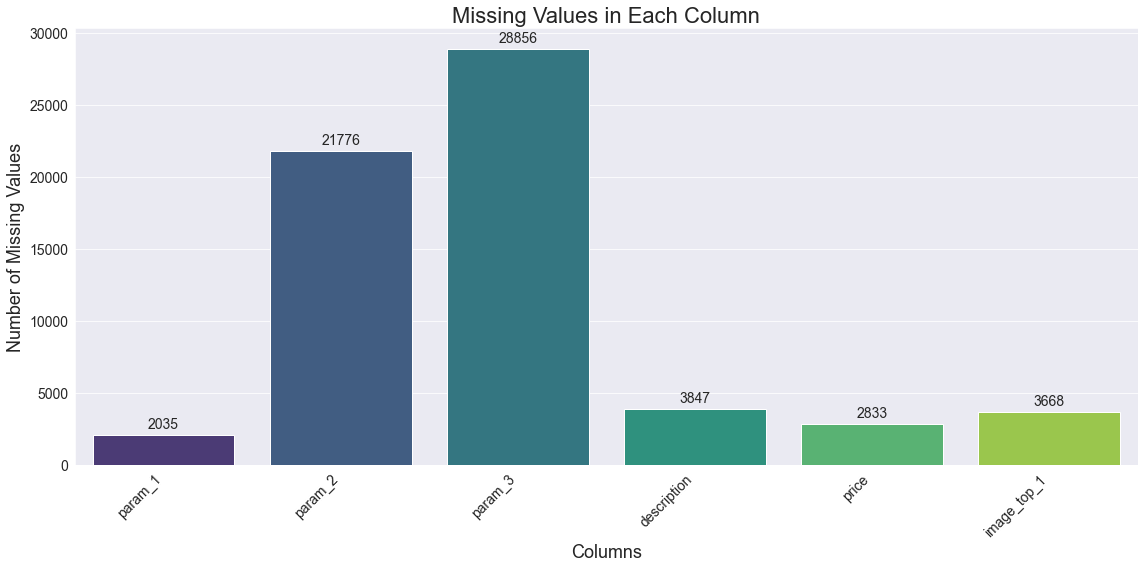

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(16, 8))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

plt.xticks(rotation=45, ha='right')
plt.title('Missing Values in Each Column', fontsize=22)
plt.xlabel('Columns', fontsize=18)
plt.ylabel('Number of Missing Values', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in range(len(missing_values)):
    plt.text(i, missing_values.iloc[i] + max(missing_values) * 0.01, missing_values.iloc[i], ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

Based on the plot above, we can see that there are missing values in the following columns:
1. **Optional parameters from Avito's ad model: `param_1`, `param_2`, `param_3`**
   - The columns `param_1`, `param_2`, and `param_3` have a large number of missing values, However, since these columns are optional parameters according to the dataset description, the high number of missing values is expected. Moreover, these parameters are categorical, so we can handle missing values by imputing them as a separate category.

2. **Missing Values in `description` and `price`**:
   - The `description` column has 3,847 missing entries. This is critical because the description is one of the key factors that can influence buyer interest. Missing descriptions could lead to lower prediction accuracy. We will impute these missing values with a placeholder text, such as "No description available."
   - The `price` column has 2,833 missing entries. Price is another important factor for demand prediction. We can impute these missing values with the median price within each category to maintain the distribution of prices within similar ads.

3. **Missing Values in `image_top_1`**:
   - The `image_top_1` column, which represents Avito's classification code for the image, has 3,668 missing entries. Since images are a significant part of the listing, missing this data could affect the prediction accuracy. Missing value may indicate that Avito's classification algorithm failed to classify the image. We will impute these missing values with a value that is not present in the dataset to distinguish them from the actual values.

#### Imputing param_1, param_2, and param_3

In [25]:
data['param_1'] = data['param_1'].fillna('missing')
data['param_2'] = data['param_2'].fillna('missing')
data['param_3'] = data['param_3'].fillna('missing')

#### Imputing description

In [26]:
data['description'] = data['description'].fillna('No description available')

#### Imputing price

In [29]:
category_price_median = data.groupby('category_name')['price'].median()
category_price_median

category_name
Автомобили                       240000.0
Аквариум                            350.0
Аудио и видео                      2000.0
Билеты и путешествия               9750.0
Бытовая техника                    3000.0
Велосипеды                         5000.0
Водный транспорт                  44600.0
Гаражи и машиноместа             150000.0
Готовый бизнес                   225000.0
Грузовики и спецтехника          310000.0
Детская одежда и обувь              500.0
Дома, дачи, коттеджи            1400000.0
Другие животные                    3000.0
Земельные участки                550000.0
Игры, приставки и программы        1790.0
Квартиры                        1680000.0
Книги и журналы                     200.0
Коллекционирование                  800.0
Коммерческая недвижимость         90000.0
Комнаты                          390000.0
Кошки                              1000.0
Красота и здоровье                  600.0
Мебель и интерьер                  3000.0
Мотоциклы и мототехн

In [31]:
data['price'] = data['price'].fillna(data['category_name'].map(category_price_median))

#### Imputing image_top_1

In [33]:
max_image_top_1 = data['image_top_1'].max()
max_image_top_1

3066.0

In [34]:
data['image_top_1'] = data['image_top_1'].fillna(max_image_top_1 + 1)

In [35]:
print(f'Missing values in the dataset: {data.isnull().sum().sum()}')

Missing values in the dataset: 0
